In [1]:
## Import libraries
# Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns            # For statistical data visualization
from scipy.optimize import curve_fit

# Lab 3 Part A
Force vs displacement for each type of spring

In [5]:
# Import dataset for part A
partA1_2lbsperin = pd.read_excel('PartA-1_2lbin.xlsx', skiprows = 1)
partA2_5lbsperin = pd.read_excel('PartA-2_5lbin.xlsx', skiprows = 1)
partA3_8lbsperin = pd.read_excel('PartA-3_8lbin.xlsx', skiprows = 1)
partA8_4lbsperin = pd.read_excel('PartA-8_4lbin.xlsx', skiprows = 1)

partA1_2lbsperin.head()

,Time (s),Load Cell (kg),LVIT (V)
0,0.05,0.468866,-0.065540
1,0.10,0.469031,-0.066526
2,0.15,0.469195,-0.066197
3,0.20,0.468866,-0.065211
4,0.25,0.469195,-0.066197


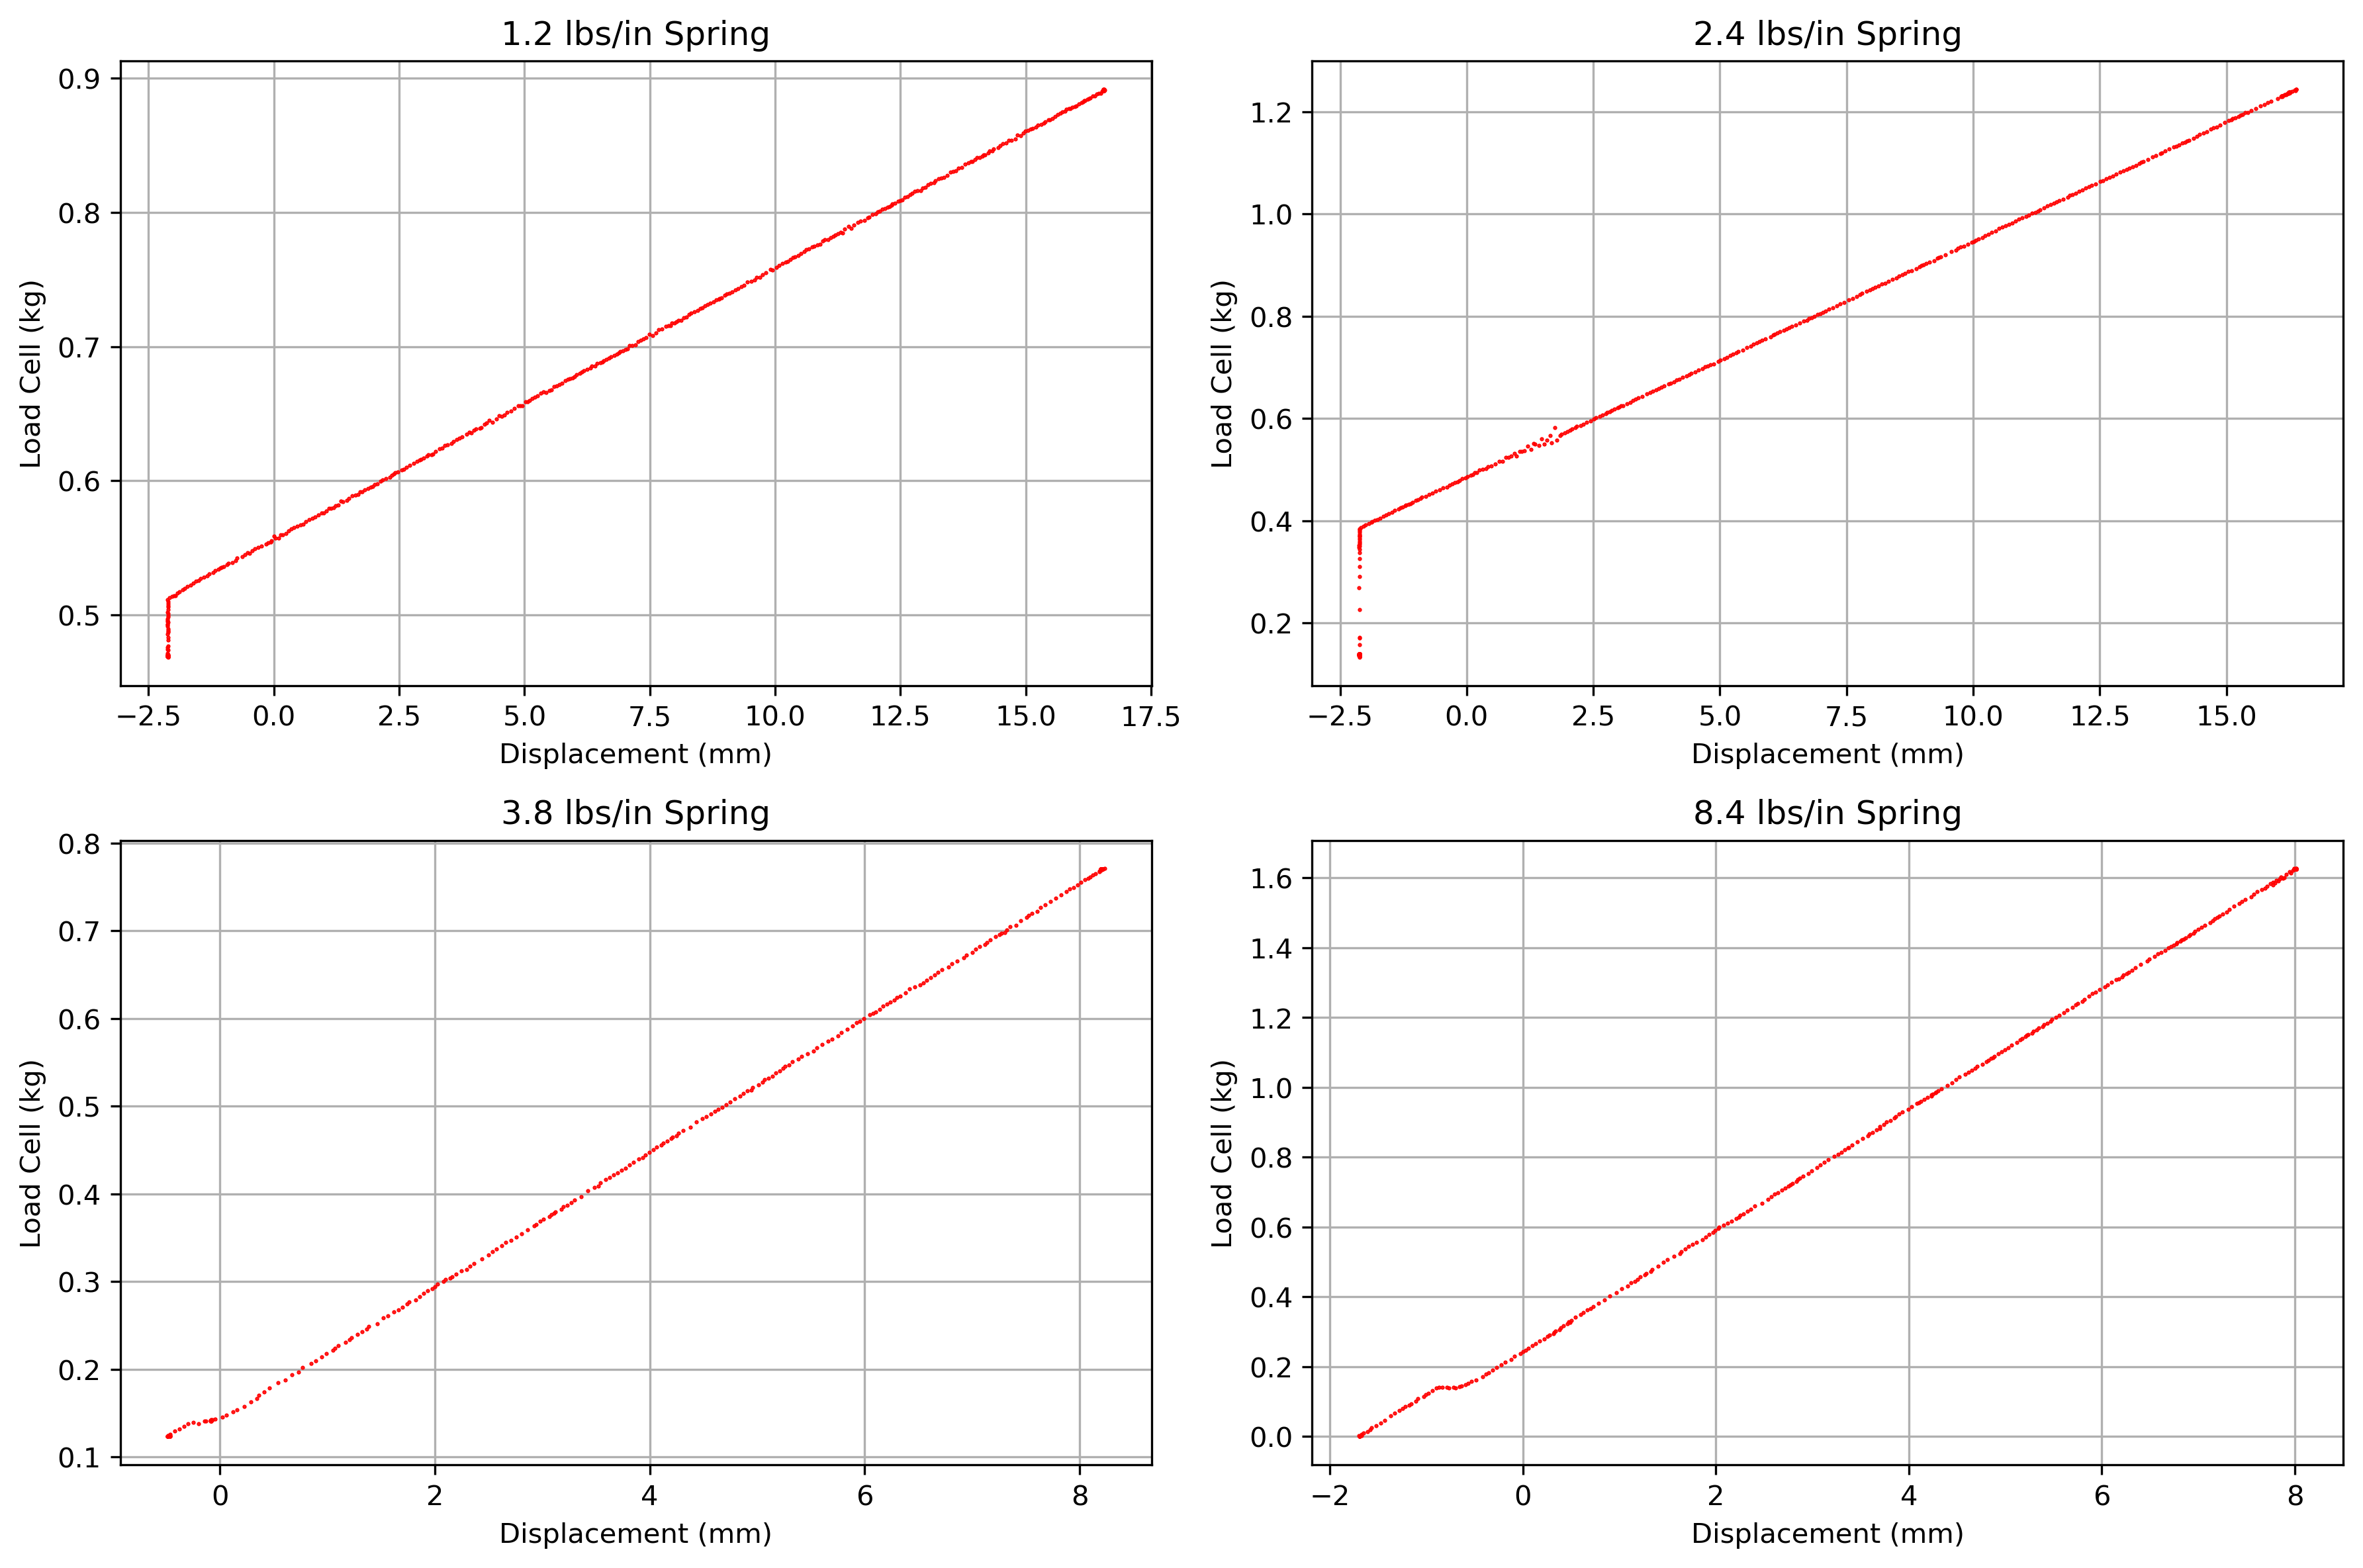

In [16]:
displacement1_2lbsperin = []
displacement2_5lbsperin = []
displacement3_8lbsperin = []
displacement8_4lbsperin = []

# Plotting large data efficiently
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300)  # 2 rows, 2 columns

# V(x) = -0.35 + 0.19x
for i in range(0, len(partA1_2lbsperin['Load Cell (kg)'])):
    displacement1_2lbsperin.append((partA1_2lbsperin['LVIT (V)'][i] - 0.345)/0.194)

for i in range(0, len(partA2_5lbsperin['Load Cell (kg)'])):
    displacement2_5lbsperin.append((partA2_5lbsperin['LVIT (V)'][i] - 0.345)/0.194)

for i in range(0, len(partA3_8lbsperin['Load Cell (kg)'])):
    displacement3_8lbsperin.append((partA3_8lbsperin['LVIT (V)'][i] - 0.345)/0.194)

for i in range(0, len(partA8_4lbsperin['Load Cell (kg)'])):
    displacement8_4lbsperin.append((partA8_4lbsperin['LVIT (V)'][i] - 0.345)/0.194)

partA1_2lbsperin['Displacement (mm)'] = displacement1_2lbsperin
partA2_5lbsperin['Displacement (mm)'] = displacement2_5lbsperin
partA3_8lbsperin['Displacement (mm)'] = displacement3_8lbsperin
partA8_4lbsperin['Displacement (mm)'] = displacement8_4lbsperin

# Plot for 1.2lbs/in spring
axs[0, 0].plot(partA1_2lbsperin['Displacement (mm)'], partA1_2lbsperin['Load Cell (kg)'], 'o', color='r', markersize=0.5)
axs[0, 0].set_title('1.2 lbs/in Spring')
axs[0, 0].set_xlabel('Displacement (mm)')
axs[0, 0].set_ylabel('Load Cell (kg)')
axs[0, 0].grid(True)

# Plot for 2.4lbs/in spring
axs[0, 1].plot(partA2_5lbsperin['Displacement (mm)'], partA2_5lbsperin['Load Cell (kg)'], 'o', color='r', markersize=0.5)
axs[0, 1].set_title('2.4 lbs/in Spring')
axs[0, 1].set_xlabel('Displacement (mm)')
axs[0, 1].set_ylabel('Load Cell (kg)')
axs[0, 1].grid(True)

# Plot for 3.8lbs/in spring
axs[1, 0].plot(partA3_8lbsperin['Displacement (mm)'], partA3_8lbsperin['Load Cell (kg)'], 'o', color='r', markersize=0.5)
axs[1, 0].set_title('3.8 lbs/in Spring')
axs[1, 0].set_xlabel('Displacement (mm)')
axs[1, 0].set_ylabel('Load Cell (kg)')
axs[1, 0].grid(True)

# Plot for 8.4lbs/in spring
axs[1, 1].plot(partA8_4lbsperin['Displacement (mm)'], partA8_4lbsperin['Load Cell (kg)'], 'o', color='r', markersize=0.5)
axs[1, 1].set_title('8.4 lbs/in Spring')
axs[1, 1].set_xlabel('Displacement (mm)')
axs[1, 1].set_ylabel('Load Cell (kg)')
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

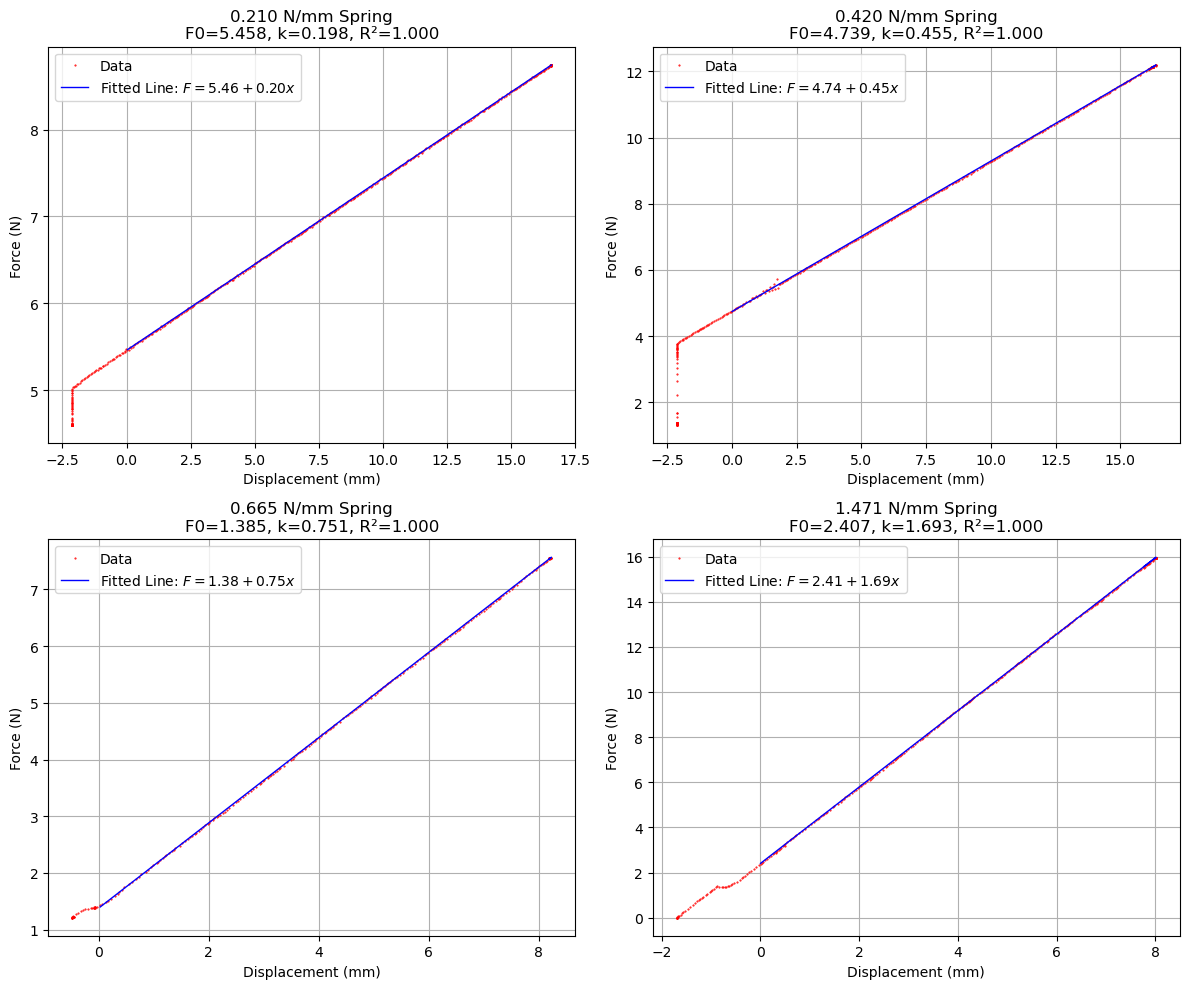

In [25]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# define the model function to fit
def model_function(x, F0, k):
    return F0 + k*x

# Define a function to calculate R^2
def r_squared(y, y_fit):
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define spring data and titles
springs_data = [
    (partA1_2lbsperin, '0.210 N/mm Spring', (0, 0)),
    (partA2_5lbsperin, '0.420 N/mm Spring', (0, 1)),
    (partA3_8lbsperin, '0.665 N/mm Spring', (1, 0)),
    (partA8_4lbsperin, '1.471 N/mm Spring', (1, 1))
]

# Process each spring
for data, title, (i, j) in springs_data:
    force_N = data['Load Cell (kg)'] * 9.81
    
    # Filter data to start at zero displacement and after
    mask = data['Displacement (mm)'] >= 0
    x_data = data['Displacement (mm)'][mask]
    y_data = force_N[mask]
    
    # Fit the model to the filtered data
    popt, pcov = curve_fit(model_function, 
                          x_data, 
                          y_data,
                          p0=[1, -1])
    F0, k = popt
    
    # Calculate the fitted values
    y_fit = model_function(x_data, *popt)
    
    # Calculate R^2
    r2 = r_squared(y_data, y_fit)
    
    # Plot all data points
    axs[i, j].plot(data['Displacement (mm)'], force_N, 'o', 
                   color='r', markersize=0.5, label='Data')
    
    # Plot fit only for the filtered portion
    axs[i, j].plot(x_data, y_fit, '-', 
                   color='b', linewidth=1, label=rf'Fitted Line: $F = {F0:.2f} + {k:.2f} x$')
    
    # Add title and labels with fit parameters
    axs[i, j].set_title(f'{title}\nF0={F0:.3f}, k={k:.3f}, R²={r2:.3f}')
    axs[i, j].set_xlabel('Displacement (mm)')
    axs[i, j].set_ylabel('Force (N)')
    axs[i, j].grid(True)
    axs[i, j].legend()

plt.tight_layout()
plt.show()

0.210 N/mm Spring: F = 5.468 (N) + 0.198 (N/mm) * x
0.420 N/mm Spring: F = 4.739 (N) + 0.455 (N/mm) * x
0.665 N/mm Spring: F = 1.385 (N) + 0.751 (N/mm) * x
1.471 N/mm Spring: F = 2.407 (N) + 1.693 (N/mm) * x